In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/DKD/GAN/GANomaly'
! ls 


Mounted at /content/drive
/content/drive/Shareddrives/DKD/GAN/GANomaly
 Checkpoin_16_1		    GANomaly_Mnist.ipynb   Generator.h5
 Checkpoints		    GANomaly_mnist_test    name_model_roc_curve.png
'Confusion matrix_cm.png'   Ganomaly.py		   pre_rec_curve.png
 ganomaly-mnist.ipynb	    Generator_encoder.h5   Streamlit_GANomaly.ipynb


# **Streamlit**

In [2]:
!pip install streamlit --quiet
!pip install streamlit-drawable-canvas --quiet
# from pyngrok import ngrok

     |████████████████████████████████| 9.7 MB 4.7 MB/s 
     |████████████████████████████████| 111 kB 52.9 MB/s 
     |████████████████████████████████| 180 kB 54.5 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 4.3 MB 54.0 MB/s 
     |████████████████████████████████| 164 kB 50.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 128 kB 42.9 MB/s 
     |████████████████████████████████| 792 kB 59.4 MB/s 
     |████████████████████████████████| 380 kB 46.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.1 which is incompatible.
google-colab 1.0.0 requires ipytho

In [ ]:
%%writefile Ganomaly.py
import streamlit as st
from streamlit_drawable_canvas import st_canvas
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np


st.title("GAN-based anomaly detection for MNIST Dataset")
st.write('**ADVANCED TECHNIQUES OF DATA ANALYSIS**')
st.write('Student: **Dao Khanh Dung - 504416**')

model_name = st.sidebar.selectbox("Select Model", ('GANomaly', 'EGBAD', 'CBiGAN'))
st.write("Model: ",model_name)

Testing_image = st.sidebar.selectbox("Select Image", ('Upload Image', 'Draw'))
st.write("Testing Image: ",Testing_image)

#=============LOAD GANomaly Model====================
encoder = keras.models.load_model('/content/drive/Shareddrives/DKD/GAN/GANomaly/Generator_encoder.h5')
generator = keras.models.load_model('/content/drive/Shareddrives/DKD/GAN/GANomaly/Generator.h5')

#==========Preprocess image================
width, height = 256, 256

def predict_image(test_x):
    encoded = encoder.predict(test_x)
    gan_x = generator.predict(test_x)
    encoded_gan = encoder(gan_x)
    score = np.sum(np.absolute(encoded - encoded_gan), axis=-1) #Score between Z and Z_hat L1_score
    score = (score - 8.719178) / (44.066288 - 8.719178) # map to 0~1

    fig = plt.figure(figsize=(1,1))
    image = np.reshape(gan_x, (height,width))
    image = image * 127 + 127
    plt.title("Generator")
    plt.imshow(image.astype(np.uint8), cmap='gray')
    st.pyplot(fig)

    st.write('Score: ', score[0])
    if score >= 0.47:
        st.write('**Result: ANOMALY**')
    else:
        st.write('**Result: Normal**')

if Testing_image == 'Upload Image':
    # #==============Upload image===============
    file = st.file_uploader("Please upload image", type=["jpg", "png"])
    if not (file is None):
        image = Image.open(file)
        image = image.resize((width, height))
        st.image(image, caption='Uploaded Image.', use_column_width=False)
        image = np.array(image)
        st.write("")
        st.write("Identifying...")
        
    #============Predict===================
    if st.button('Predict'):
        # test_x = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_x = image.reshape(1, 256, 256, 1)
        test_x = test_x/ 127 -1
        predict_image(test_x)


if Testing_image == 'Draw':
    canvas_result = st_canvas(
        fill_color="#ffffff",
        stroke_width=25,
        stroke_color='#ffffff',
        background_color="#000000",
        height=256,width=256,
        drawing_mode='freedraw',
        key="canvas",
    )

    if canvas_result.image_data is not None:
        img = cv2.resize(canvas_result.image_data.astype('uint8'), (256, 256))

    #============Predict===================
    if st.button('Predict'):
        test_x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        test_x = test_x.reshape(1, 256, 256, 1)
        test_x = test_x/ 127 -1
        predict_image(test_x)

Overwriting Ganomaly.py


In [3]:
!streamlit run Ganomaly.py & npx localtunnel --port 8501

2022-02-16 21:02:24.607 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.122.176.202:8501

npx: installed 22 in 6.442s
your url is: https://swift-lizard-19.loca.lt
2022-02-16 21:02:49.772891: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-16 21:02:49.941 No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
2022-02-16 21:02:53.023 No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
2022-02-16 21:03:46.247 No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
2022-02-16 21:03:46.910 No training configuration found in the save file, so the model was *not* compiled. Compile it manually.
2022-02-16 21:03:51.372 No trainin

# **Test_GANomaly_Model**

In [ ]:
import imp
import time
from keras import layers
import keras
import keras.backend as K
import tensorflow as tf
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

11501568/11490434 [==============================] - 0s 0us/step
10000
Shape x_ok before resize: (6742, 28, 28)
2167
1135
1032


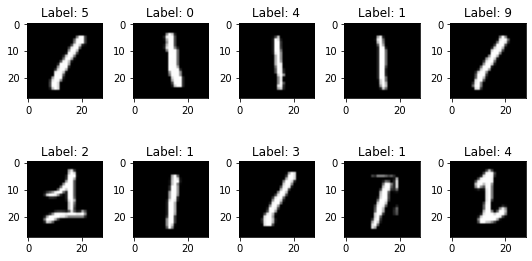

In [ ]:
from keras.datasets import mnist
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_test))
x_ok = x_train[y_train == 1] # 6742 samples
x_test = x_test[(y_test == 1) | (y_test == 2)] # 1135 samples "1", 1028 samples "7"
y_test = y_test[(y_test == 1) | (y_test == 2)]
print("Shape x_ok before resize:",x_ok.shape)
print(len(x_test))
print(len(x_test[y_test==1]))
print(len(x_test[y_test==2]))

#Print X_training
num = 10
images = x_ok[:num]
labels = y_train[:num]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
width, height = 256, 256
def reshape_x(x):
    new_x = np.empty((len(x), width, height))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1 #Normalize in the range [-1, 1]

x_test = reshape_x(x_test)
print("Shape x_test before resize:",x_test.shape)

Shape x_test before resize: (2167, 256, 256, 1)


In [ ]:
print(y_test[:20])
y_test[y_test == 1] = 0
y_test[y_test != 0] = 1
print(y_test[:10])

[2 1 1 1 1 1 2 1 2 1 1 2 1 2 1 2 1 2 2 1]
[1 0 0 0 0 0 1 0 1 0]


In [ ]:
from numpy.lib.npyio import loads
# load and evaluate a saved model
from keras.models import load_model

# load model
g_e = load_model("Generator_encoder.h5") #Generator Encoder
g = load_model("Generator.h5")

In [ ]:
# In[] Evaluation
encoded = g_e.predict(x_test) # Output is latent space Z
gan_x = g.predict(x_test)  #Generator make the Fake Image
encoded_gan = g_e.predict(gan_x) #Encode Fake Img =>> Z_hat
score = np.sum(np.absolute(encoded - encoded_gan), axis=-1) #Score between Z and Z_hat L1_score
score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1

In [ ]:
print(score)

[0.5744916  0.1065708  0.03571512 ... 0.5160831  0.05050171 0.71794885]


In [ ]:
print(x_test.shape)
print(encoded.shape)

(2167, 256, 256, 1)
(2167, 128)


1032


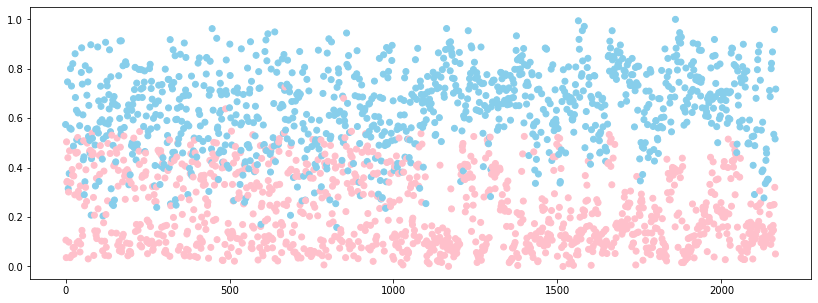

In [ ]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
print(len(x_test[y_test!=0]))
plt.scatter(range(len(x_test)), score, c=['skyblue' if x != 0 else 'pink' for x in y_test])

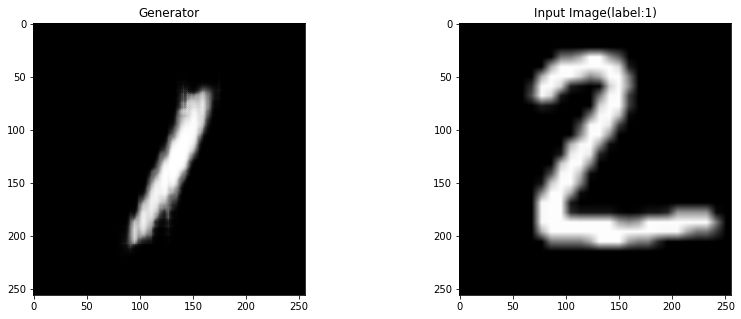

In [ ]:
# In[]
i = 0 # or 1
fig,ax = plt.subplots(1, 2)
image = np.reshape(gan_x[i:i+1], (height,width))
image = image * 127 + 127
ax[0].set_title("Generator")
ax[0].imshow(image.astype(np.uint8), cmap='gray')
image = np.reshape(x_test[i:i+1], (height,width))
image = image * 127 + 127
ax[1].set_title("Input Image(label:"+str(y_test[i])+")")
ax[1].imshow(image.astype(np.uint8), cmap='gray')

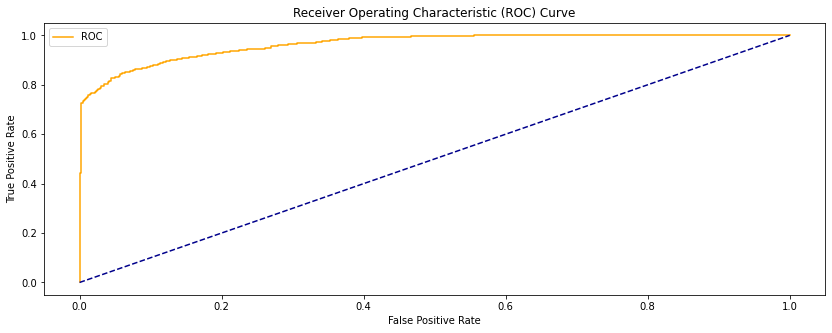

auc:  0.9636307755352935
threshold:  0.47037756
Accuracy:  0.8947854176280572
False Alarm Rate:  0.07234042553191489
Leakage Rate:  0.13039934800325997
precision_score:  0.9276595744680851
recall_score:  0.8449612403100775
F1-Score:  0.8843813387423934
Confusion matrix, without normalization
[[1067   68]
 [ 160  872]]


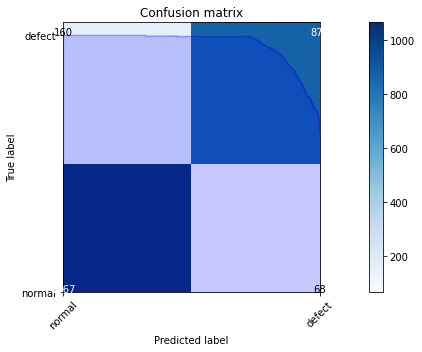

In [ ]:
from sklearn.metrics import f1_score, precision_score,roc_curve, auc, accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from inspect import signature


# %%
import itertools

def plot_roc_curve(fpr, tpr, name_model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig(name_model+'_roc_curve.png')
    plt.show()
    # plt.close() 

def roc(labels, scores, name_model):
    """Compute ROC curve and ROC area for each class"""
    roc_auc = dict()
    # True/False Positive Rates.
    fpr, tpr, threshold = roc_curve(labels, scores)
    # print("threshold: ", threshold)
    roc_auc = auc(fpr, tpr)
    # get a threshod that perform very well.
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    # draw plot for ROC-Curve
    plot_roc_curve(fpr, tpr, name_model)
    
    return roc_auc, optimal_threshold

auc_out, threshold = roc(y_test, score, 'name_model')


predictions = (score > threshold).astype(int)
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions).numpy()
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]




diagonal_sum = cm.trace()
sum_of_all_elements = cm.sum()
print("auc: ", auc_out)
print("threshold: ", threshold)
print("Accuracy: ", diagonal_sum / sum_of_all_elements )
print("False Alarm Rate: ", FP/(FP+TP))
print("Leakage Rate: ", FN/(FN+TN))
print("precision_score: ",precision_score(y_test, predictions))
print("recall_score: ", TP/(TP+FN))
#         F1 = 2 * (precision * recall) / (precision + recall)
print("F1-Score: ", f1_score(y_test, predictions))
# %%
def pre_rec_curve(labels, scores, show=False):
    average_precision = average_precision_score(labels, scores)
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    if show:
        precision, recall, _ = precision_recall_curve(labels, scores)
        step_kwargs = ({
            'step': 'post'
        } if 'step' in signature(plt.fill_between).parameters else {})
        plt.figure()
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall,
                         precision,
                         alpha=0.2,
                         color='b',
                         **step_kwargs)

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
            average_precision))
        plt.savefig("pre_rec_curve.png")
#         plt.close()
    return {'average_precision': average_precision}

pre_rec_curve=pre_rec_curve(y_test, score, show=True)
#%%
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title+'_cm.png')
    # plt.close()
class_names = ["normal", "defect"]
plot_confusion_matrix(cm, class_names, title='Confusion matrix')

In [ ]:
x= x_test[0]
x = np.expand_dims(x, axis=0)
print(x.shape)
# # In[] Evaluation
encoded_test = g_e.predict(x) # Output is latent space Z

print(encoded_test.shape)
gan_x_test = g.predict(x)  #Generator make the Fake Image
print(gan_x_test.shape)

encoded_gan_test = g_e.predict(gan_x_test) #Encode Fake Img =>> Z_hat
print(encoded_gan_test.shape)

(1, 256, 256, 1)
(1, 128)
(1, 256, 256, 1)
(1, 128)


In [ ]:
score_test = np.sum(np.absolute(encoded_test - encoded_gan_test), axis=-1) #Score between Z and Z_hat L1_score
print(score_test)
score_test = (score_test - 8.719178) / (44.066288 - 8.719178) # map to 0~1
print(score_test)

[29.025799]
[0.5744917]
